# SkySim5000 IA Infusion Validation – Corner Plots Notebook

This notebook generates corner plots for the validation of intrinsic alignment (IA) models using SkySim5000 simulation data infused with IA signals, as described in [Harnois-Déraps & Šarčević *et al.*](https://arxiv.org/abs/xxxx.xxxxx).

## Notebook Overview
- Loads pre-generated chains from `output/chains/` (generated using CosmoSIS).
- Plots corner plots for IA models compared against TATT and other IA models.
- Uses `helpers/chains_processing.py` for chain loading and processing.
- Uses `helpers/plot_handlers.py` for customized plotting styles.

## Instructions
1. Ensure that the required directories (`output/chains/`, `helpers/`) are available and populated.
2. Run the notebook cells to:
   - Load chains.
   - Generate and customize corner plots for each model comparison.
3. **No rerunning of CosmoSIS is necessary unless analysis settings change.**


**Niko dont forget to** `xxxx.xxxxx` in the arXiv link with the actual paper ID.


In [1]:
import matplotlib.pyplot as plt
import helpers.plot_handlers as ph
import helpers.chains_processing as cp


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [2]:
samples = cp.samples  # import chains (processed and ready to go into getDist)
truth_values = cp.truth_values  # import truth values
labels = ph.labels  # get labels defined in plot_helpers
colors = ph.get_colors()  # get the color scheme define in plot_helpers
plot_path = ph.plot_path()  # get the output path where plots are going to be saved
g = ph.get_plot_settings()  # get the settings for getDist corner plots

In [3]:
samples.keys()

dict_keys(['NLA_with_NLA', 'NLA_with_TATT', 'NLA_with_NLA_w', 'NLA_with_TATT_w', 'deltaNLA_with_deltaNLA', 'deltaNLA_with_TATT', 'TT_with_TT', 'TT_with_TATT', 'deltaTT_with_TT', 'deltaTT_with_deltaTT', 'deltaTT_with_TATT', 'HOD_NLA_with_deltaNLA', 'HOD_NLA_with_TATT', 'HOD_TT_with_TT', 'HOD_TT_with_deltaTT', 'HOD_TT_with_TATT'])

## Plots

### NLA model

We first see if we can recover the NLA model with the NLA and TATT targets.

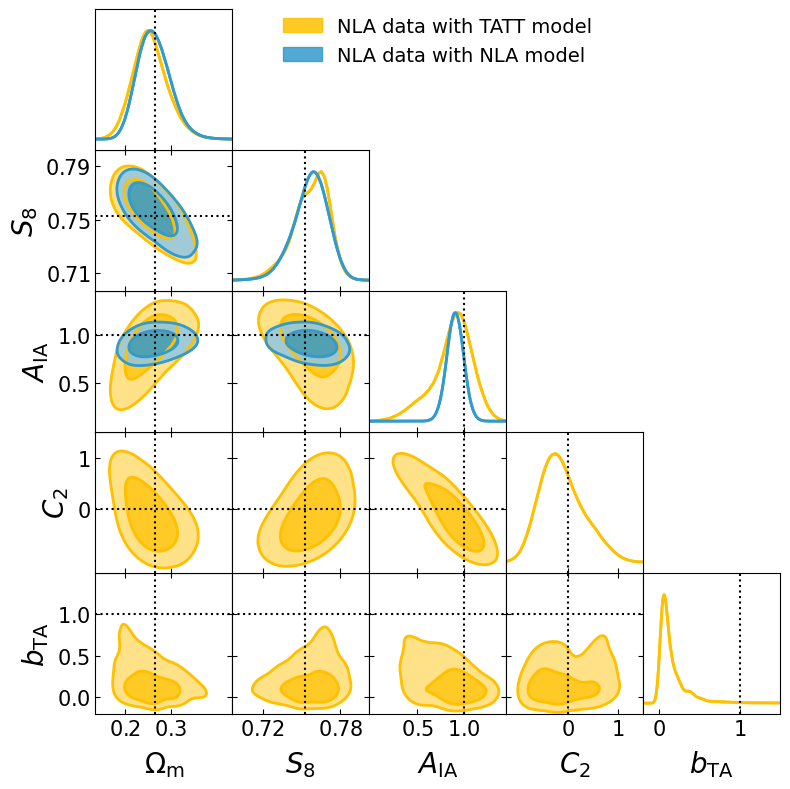

In [4]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "NLA"
model2 = "TATT"
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model1}"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1]] * 2 + [samples[key2]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[key1],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Adjust y-axis limits for the last row in the triangle plot
num_vars = len(g.subplots)
for i in range(num_vars):
    ax = g.subplots[i, i]  # Access the diagonal (1D Gaussian) panel
    if ax is not None:
        ax.set_ylim(-0.1, 1.2)

for ax in g.subplots[-1,:-1]:
    if ax is not None:  # Ensure the subplot exists
        ax.set_ylim(-0.2, 1.5)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

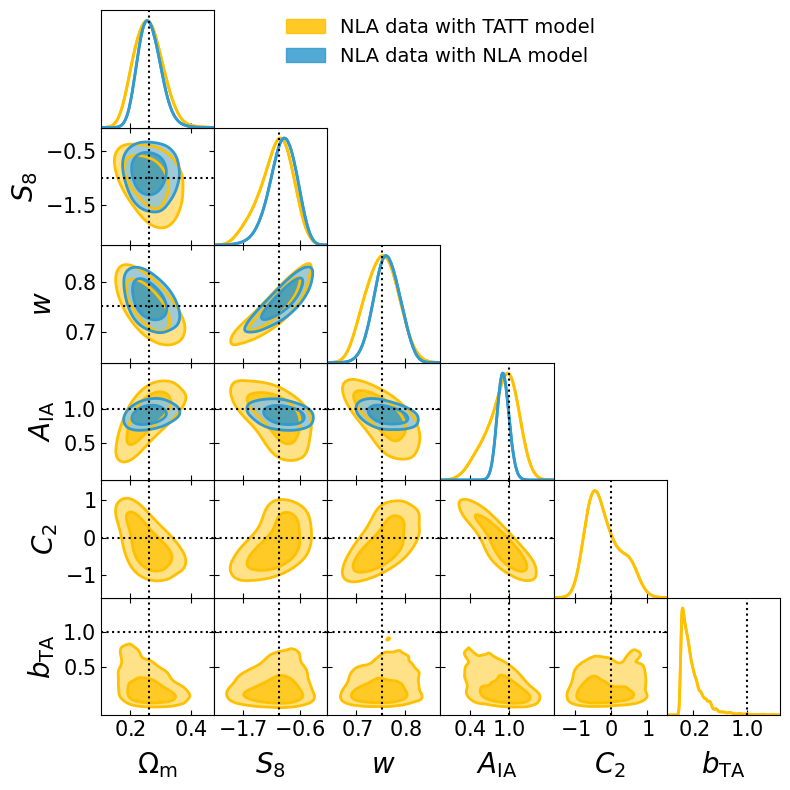

In [5]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "NLA"
model2 = "TATT"
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model1}"
key1_w = f"{model1}_with_{model2}_w"
key2_w = f"{model1}_with_{model1}_w"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1_w]] * 2 + [samples[key2_w]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[key1_w],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Adjust y-axis limits for the last row in the triangle plot
for ax in g.subplots[-1,:-1]:
    if ax is not None:  # Ensure the subplot exists
        ax.set_ylim(-0.2, 1.5)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_w_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_w_combo.png", dpi=300)

### $\delta$NLA model

Next, we look at the $\delta$NLA model with the $\delta$NLA and TATT targets.

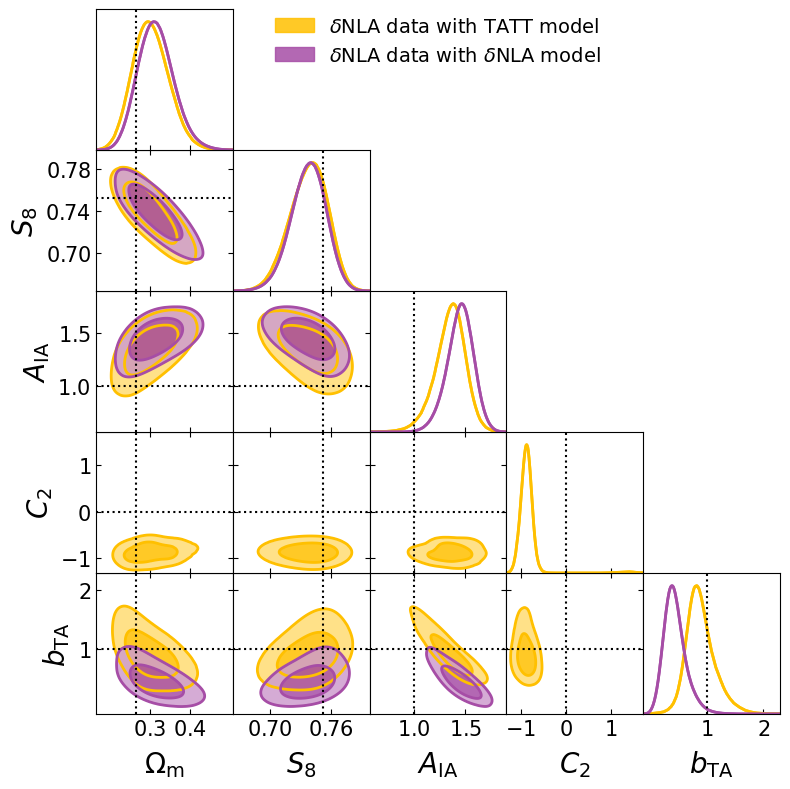

In [6]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "deltaNLA"
model2 = "TATT"
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model1}"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1]] * 2 + [samples[key2]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[key1],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

### TT model

Now, we examine the TT model with the TT and TATT targets.

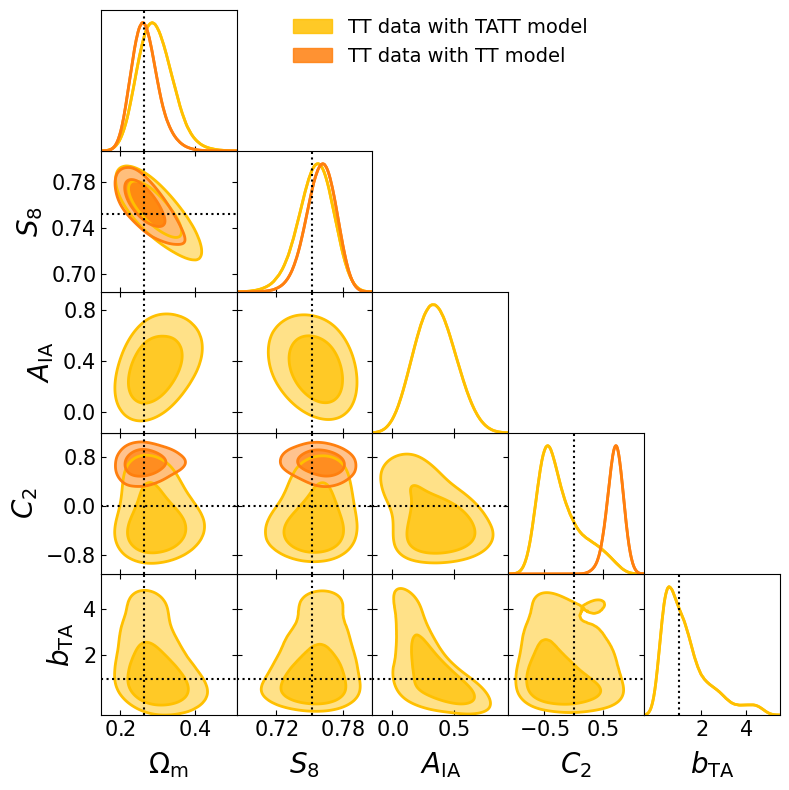

In [7]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "TT"
model2 = "TATT"
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model1}"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1]] * 2 + [samples[key2]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[key1],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

### $\delta$TT model

We then analyze the $\delta$TT model with the $\delta$TT and TATT targets.

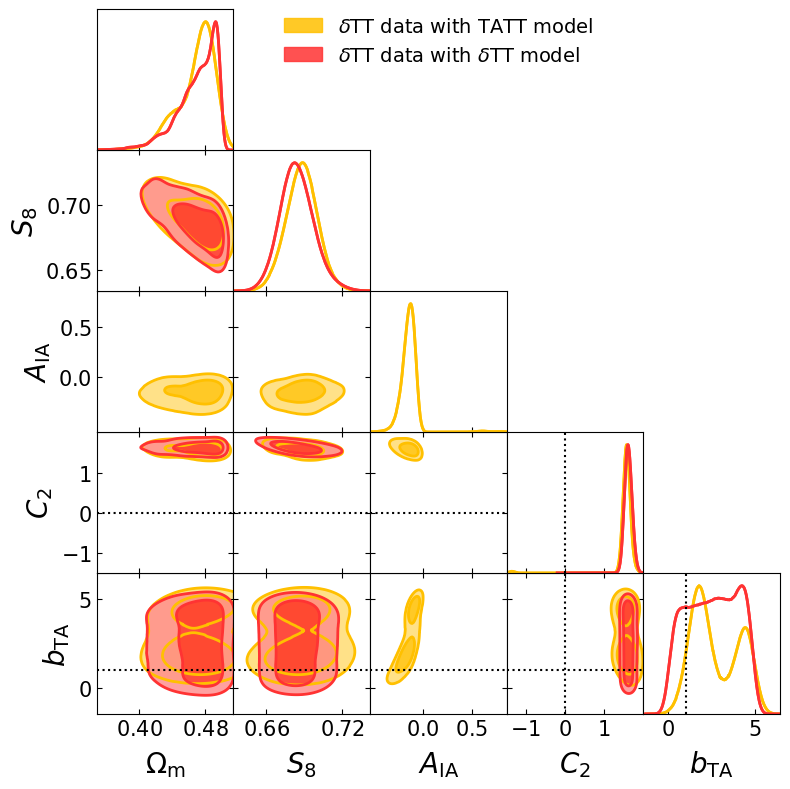

In [8]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "deltaTT"
model2 = "TATT"
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model1}"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1]] * 2 + [samples[key2]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[key1],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

### HOD NLA model

Next, we investigate the HOD NLA model with the $\delta$NLA and TATT targets.

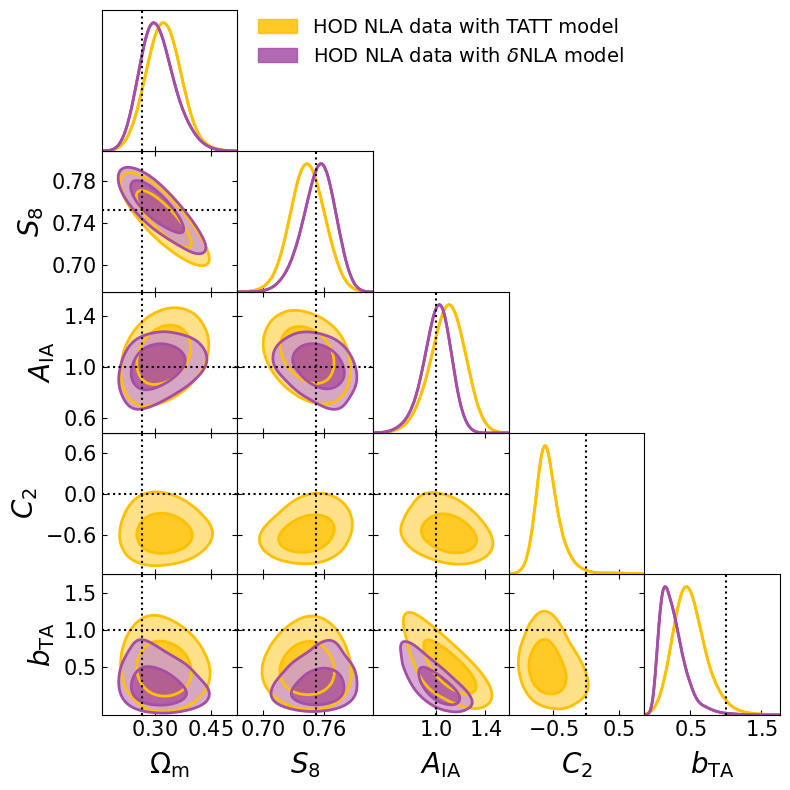

In [9]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "HOD_NLA"
model2 = "TATT"
model3 = "deltaNLA"  # we do not have a HOD NLA with HOD NLA model, so we use deltaNLA as a target
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model3}"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1]] * 2 + [samples[key2]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[key1],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

### HOD TT model

Finally, we explore the HOD TT model with the TT, $\delta$TT, and TATT targets.

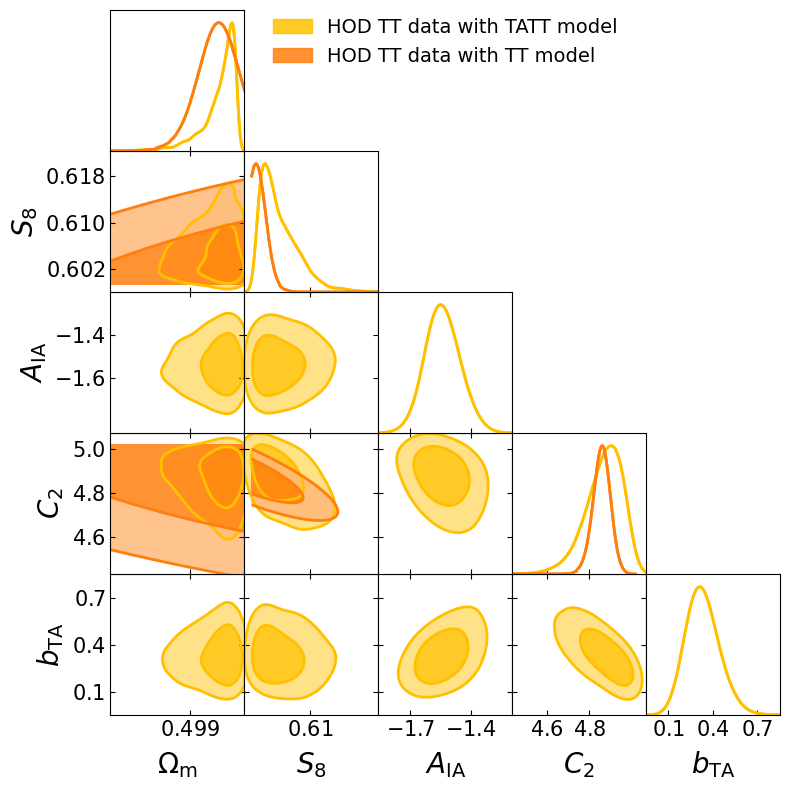

In [10]:
# Make strings we can pass around in our dictionary
# We first define the models we want to compare
model1 = "HOD_TT"
model2 = "TATT"
model3 = "TT"  # we do not have a HOD NLA with HOD NLA model, so we use deltaNLA as a target
# We then construct the sample keys
key1 = f"{model1}_with_{model2}"
key2 = f"{model1}_with_{model3}"

# Make lists with samples and colors
# We do this twice so our corner plots look better
samples_list = [samples[key1]] * 2 + [samples[key2]] * 2
colors_list = [colors[key1]] * 2 +  [colors[key2]] * 2

# Generate kwargs and labels for the triangle plot
kwargs = ph.get_kwargs(key1, key2)
legend_labels = ph.get_legend_labels(key1, key2)

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values["TT_with_TATT"],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

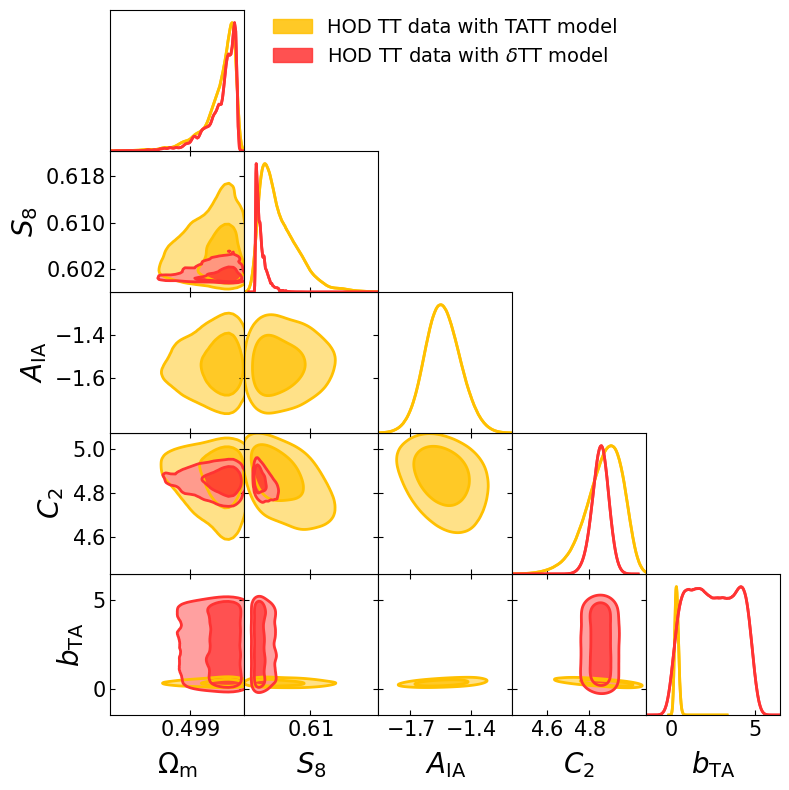

In [11]:
model1 = "HOD_TT"  # define the first I model
model2 = "TATT"  # define the second IA model
model3 = "deltaTT"
# Make a string we can pass around
model1_str = f"{model1}_with_{model3}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"HOD TT data with {model2} model",
                 "_nolegend_",
                 f"HOD TT data with $\delta$TT model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.pdf", dpi=300)
# plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.png", dpi=300)
